In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
import seaborn as sb
%matplotlib inline

In [2]:
data = pd.read_csv("C:/Users/pal/Desktop/projects/project_3/Advertising.csv")

In [3]:
data.head(2)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4


In [4]:
data=data.drop(['Unnamed: 0'], axis=1)

C:\Users\pal\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


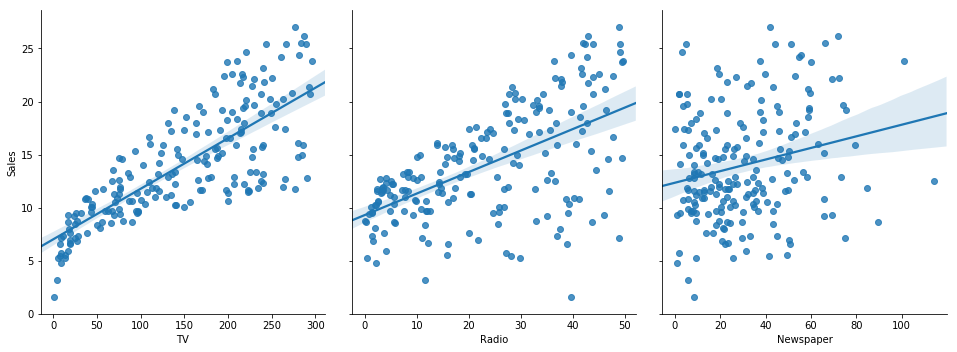

In [5]:
sb.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=5,aspect=0.9, kind='reg')

In [6]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<Figure size 720x720 with 0 Axes>

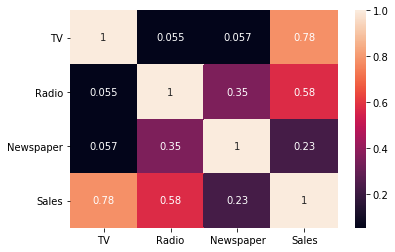

<Figure size 720x720 with 0 Axes>

In [7]:
sb.heatmap(data.corr(),color = "R", annot=True)
plt.figure(figsize=(10,10))

In [8]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lig=LinearRegression()
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


In [10]:
lig.fit(X_train,y_train)
y_pred= lig.predict(X_test)
lig.score(X_test,y_test)

0.8479943800789

In [11]:
print(lig.intercept_)
print(lig.coef_)

3.3465153569190615
[ 0.04551299  0.18911982 -0.00852997]


In [12]:
feature_columns= ['TV', 'Radio', 'Newspaper']
zip(feature_columns,lig.coef_)


In [13]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

2.0793179982655587


In [14]:
X = data['TV']
y = data['Sales']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           1.47e-42
Time:                        10:04:47   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

C:\Users\pal\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [15]:
X = np.column_stack((data['TV'], data['Radio'], data['Newspaper']))
y = data['Sales']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           1.58e-96
Time:                        10:04:47   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

# As we can see the R² and F-statistic is much higher than that of simple linear regression, with a value of 0.897 and 570 respectively. But the third coefficient i.e. newspaper has large p-value.Therefore, ad spending on newspaper is not statistically significant. So its not a good predictor.

In [16]:
X = np.column_stack((data['TV'], data['Radio']))
y = data['Sales']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           4.83e-98
Time:                        10:04:48   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.0

In [17]:
X = data.iloc[:,:2].values
y = data.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 2)
(50, 2)
(150,)
(50,)


In [18]:
X

array([[230.1,  37.8],
       [ 44.5,  39.3],
       [ 17.2,  45.9],
       [151.5,  41.3],
       [180.8,  10.8],
       [  8.7,  48.9],
       [ 57.5,  32.8],
       [120.2,  19.6],
       [  8.6,   2.1],
       [199.8,   2.6],
       [ 66.1,   5.8],
       [214.7,  24. ],
       [ 23.8,  35.1],
       [ 97.5,   7.6],
       [204.1,  32.9],
       [195.4,  47.7],
       [ 67.8,  36.6],
       [281.4,  39.6],
       [ 69.2,  20.5],
       [147.3,  23.9],
       [218.4,  27.7],
       [237.4,   5.1],
       [ 13.2,  15.9],
       [228.3,  16.9],
       [ 62.3,  12.6],
       [262.9,   3.5],
       [142.9,  29.3],
       [240.1,  16.7],
       [248.8,  27.1],
       [ 70.6,  16. ],
       [292.9,  28.3],
       [112.9,  17.4],
       [ 97.2,   1.5],
       [265.6,  20. ],
       [ 95.7,   1.4],
       [290.7,   4.1],
       [266.9,  43.8],
       [ 74.7,  49.4],
       [ 43.1,  26.7],
       [228. ,  37.7],
       [202.5,  22.3],
       [177. ,  33.4],
       [293.6,  27.7],
       [206

In [19]:
lig.fit(X_train,y_train)
y_pred= lig.predict(X_test)
lig.score(X_test,y_test)

0.8755966947100527

In [20]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

1.749676055130532
